**Principal Component Analysis**

1. Logistic Regression
2. LDA
3. QDA
4. KNN
5. Decision Tree
6. SVM



In [1]:
#import libraries
import pandas as pd
import numpy as np
import h5py
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import pickle

from sklearn.decomposition import PCA
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading bidir data 
pickle_in = open("X_train_bidir.pickle","rb")
X_training_bidir = pickle.load(pickle_in)

pickle_in = open("y_train_bidir.pickle","rb")
y_training_bidir = pickle.load(pickle_in)

pickle_in = open("X_test_bidir.pickle","rb")
X_test_bidir = pickle.load(pickle_in)

pickle_in = open("y_test_bidir.pickle","rb")
y_test_bidir = pickle.load(pickle_in)

In [3]:
#loading unidir data 
pickle_in = open("X_train_unidir.pickle","rb")
X_training_unidir = pickle.load(pickle_in)

pickle_in = open("y_train_unidir.pickle","rb")
y_training_unidir = pickle.load(pickle_in)

pickle_in = open("X_test_unidir.pickle","rb")
X_test_unidir = pickle.load(pickle_in)

pickle_in = open("y_test_unidir.pickle","rb")
y_test_unidir = pickle.load(pickle_in)

In [4]:
X_training_bidir.shape

(3820, 54)

In [5]:
X_training_bidir.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,3820.000000,3820.000000,3.820000e+03,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,...,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000
mean,1.332478,5.323875,1.053956e-01,0.069902,2.177862,6.954766,28.332281,0.026375,5.405151,283.655126,...,3.097261,604.312052,474.518646,493.121204,149.378160,0.894648,2.370409,1369.241885,150.578272,774.780764
std,15.579214,65.289705,1.812016e+00,0.625769,1.477678,9.095396,368.018183,0.594549,65.412880,287.380691,...,37.492839,277.500543,204.007224,491.915636,230.081989,1.476588,8.214460,387.839069,76.825446,325.622800
min,0.000097,0.000047,9.999999e-07,0.000000,-2.624767,-2.750000,0.000160,0.000000,0.000108,64.666667,...,0.000310,83.310000,4.757174,62.000000,0.000000,-5.235293,-2.019192,141.000000,61.000000,89.508435
25%,0.005726,0.007946,1.106254e-03,0.001242,1.085203,1.577083,0.026852,0.000016,0.009998,112.150968,...,0.005369,399.870000,370.221288,168.000000,11.860800,0.034340,-1.653898,1130.000000,76.000000,552.557505
50%,0.012637,0.016799,2.796750e-03,0.003574,1.858385,3.534626,0.053482,0.000103,0.022811,143.724101,...,0.012594,577.135000,510.599261,240.000000,57.821400,0.416053,0.397923,1594.000000,133.000000,783.001559
75%,0.071216,0.140025,1.057355e-02,0.012393,3.032946,9.574888,0.624446,0.000164,0.159069,321.813596,...,0.073867,772.907500,654.076318,631.750000,146.962725,1.489333,1.619110,1646.000000,216.000000,1021.513932
max,582.693350,1949.488161,6.200286e+01,20.655980,9.141791,84.381947,12783.920643,27.864530,1949.529861,1667.208000,...,1277.096064,1620.640000,757.396865,1676.000000,1111.950000,9.567016,91.297446,1676.000000,304.000000,1635.989633


In [6]:
y_training_bidir.shape

(3820,)

In [7]:
X_training_unidir.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,2421.000000,2421.000000,2.421000e+03,2.421000e+03,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000
mean,0.239355,1.822079,4.027823e-03,5.058278e-03,4.017216,23.229229,17.376285,0.000082,1.834983,748.091805,351.040642,868.900454,95.560337,-0.502218,4.739149,1120.776126,168.023544,843.643489
std,3.997258,39.397897,2.638855e-02,3.204921e-02,2.265203,23.702235,393.914607,0.000158,39.403392,514.309346,264.080666,658.463166,190.559361,2.245961,14.264153,655.057807,153.040358,550.860352
min,0.000087,0.000057,9.999999e-07,1.685521e-13,-1.439182,-1.980735,0.000327,0.000000,0.000137,65.000000,0.460566,62.000000,0.000000,-9.702000,-2.019900,68.000000,62.000000,65.069194
25%,0.001454,0.002697,1.180000e-04,7.836356e-05,2.291043,5.743582,0.019119,0.000002,0.003215,123.960000,40.683260,138.000000,0.000000,-1.020628,-1.243943,198.000000,76.000000,131.181744
50%,0.003340,0.008333,3.355000e-04,1.838424e-04,3.468520,13.585992,0.050067,0.000007,0.009430,869.310000,356.073698,1194.000000,0.000000,-0.350602,1.174561,1476.000000,76.000000,1086.611375
75%,0.012421,0.027533,9.110000e-04,8.673210e-04,5.552119,34.620315,0.160139,0.000121,0.029599,1150.840000,619.363670,1476.000000,106.747200,0.561935,2.297498,1610.000000,222.000000,1292.594770
max,149.871076,1492.436792,8.174215e-01,9.856102e-01,9.849347,98.009791,14924.969473,0.005399,1492.499662,1675.080000,755.780064,1676.000000,1136.412900,9.702000,93.059700,1676.000000,1632.000000,1675.105012


In [8]:
# CV from bidirectional dataset
X_bidir_train, X_bidir_val, y_bidir_train, y_bidir_val = train_test_split(X_training_bidir, y_training_bidir, test_size=0.2, random_state=1)

In [9]:
X_unidir_train, X_unidir_val, y_unidir_train, y_unidir_val = train_test_split(X_training_unidir, y_training_unidir, test_size=0.2, random_state=1)

In [10]:
X_bidir_train.shape

(3056, 54)

In [11]:
X_bidir_val.shape

(764, 54)

***PCA***

**Bidir**

In [12]:
#Create and fit PCA object
pca = PCA()
pca.fit(X_bidir_train)

#Transforming x_train and x_test 
x_train_pca = pca.transform(X_bidir_train)
x_val_pca = pca.transform(X_bidir_val)

#Find number of components that explain predefined variance threshold
sum_variance, component_count = 0, 0
while sum_variance < 0.85:
    sum_variance += pca.explained_variance_ratio_[component_count]
    component_count += 1
    
print('Number of Principal Components that explain >=85% of Variance: ', component_count)
print('Total Variance Explained by '+str(component_count)+' components:', str(sum_variance*100)+'%')

Number of Principal Components that explain >=85% of Variance:  4
Total Variance Explained by 4 components: 86.23518550396182%


In [13]:
#Create and fit PCA object
pca = PCA(n_components=component_count)
pca.fit(X_bidir_train)

#Transforming x_train and x_val 
x_train_pca = pca.transform(X_bidir_train)
x_val_pca = pca.transform(X_bidir_val)

#Add constant to x_train and x_val
x_train_pca_cst = sm.add_constant(x_train_pca)
x_val_pca_cst = sm.add_constant(x_val_pca)

#Test dataset
# Transform x_test
x_test_pca = pca.transform(X_test_bidir)

# Add constant
x_test_pca_cst = sm.add_constant(x_test_pca)

Text(0, 0.5, 'Second Principal Component')

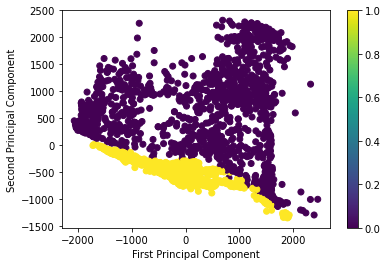

In [14]:
pca = PCA(n_components=2)
proj = pca.fit_transform(X_bidir_train)
plt.scatter(proj[:, 0], proj[:, 1], c=y_bidir_train)
plt.colorbar()
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

**Unidir**

In [15]:
#Create and fit PCA object
pca = PCA()
pca.fit(X_unidir_train)

#Transforming x_train and x_test 
x_train_pca_uni = pca.transform(X_unidir_train)
x_val_pca_uni = pca.transform(X_unidir_val)

#Find number of components that explain predefined variance threshold
sum_variance, component_count = 0, 0
while sum_variance < 0.85:
    sum_variance += pca.explained_variance_ratio_[component_count]
    component_count += 1
    
print('Number of Principal Components that explain >=85% of Variance: ', component_count)
print('Total Variance Explained by '+str(component_count)+' components:', str(sum_variance*100)+'%')

Number of Principal Components that explain >=85% of Variance:  2
Total Variance Explained by 2 components: 92.04307054701216%


In [16]:
#Create and fit PCA object
pca = PCA(n_components=component_count)
pca.fit(X_unidir_train)

#Transforming x_train and x_val 
x_train_pca_uni = pca.transform(X_unidir_train)
x_val_pca_uni = pca.transform(X_unidir_val)

#Add constant to x_train and x_val
x_train_pca_uni_cst = sm.add_constant(x_train_pca_uni)
x_val_pca_uni_cst = sm.add_constant(x_val_pca_uni)

# TEST DATASET
# Transform x_test
x_test_pca_uni = pca.transform(X_test_unidir)

# Add constant
x_test_pca_uni_cst = sm.add_constant(x_test_pca_uni)

Text(0, 0.5, 'Second Principal Component')

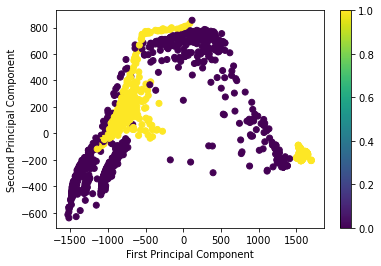

In [17]:
pca = PCA(n_components=2)
proj = pca.fit_transform(X_unidir_train)
plt.scatter(proj[:, 0], proj[:, 1], c=y_unidir_train)
plt.colorbar()
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

***Logistic Regression***

**Bidir**

In [18]:
#Training
model_lr = LogisticRegression(C=100000).fit(x_train_pca_cst, y_bidir_train)

#Predict
y_pred_train = model_lr.predict(x_train_pca_cst)
y_pred_val = model_lr.predict(x_val_pca_cst)

print("Training Set Accuracy:", accuracy_score(y_bidir_train, y_pred_train))
print("Validation Set Accuracy:", accuracy_score(y_bidir_val, y_pred_val))

Training Set Accuracy: 0.9950916230366492
Validation Set Accuracy: 0.9986910994764397


In [19]:
print(f"Training data Classification report for classifier {model_lr}:\n"
f"{metrics.classification_report(y_bidir_train, y_pred_train)}\n")

Training data Classification report for classifier LogisticRegression(C=100000):
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056




In [20]:
print(f"Validation data Classification report for classifier {model_lr}:\n"
f"{metrics.classification_report(y_bidir_val, y_pred_val)}\n")

Validation data Classification report for classifier LogisticRegression(C=100000):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       387
         1.0       1.00      1.00      1.00       377

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764




Validation data Confusion matrix:
[[387   0]
 [  1 376]]


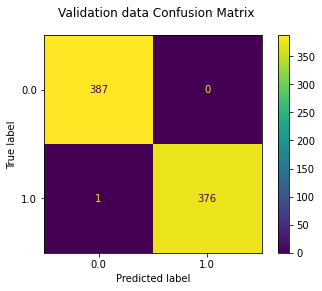

In [21]:
disp = metrics.plot_confusion_matrix(model_lr, x_val_pca_cst, y_bidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [22]:
#Predict
y_pred_test = model_lr.predict(x_test_pca_cst)

print("Test Set Accuracy:", accuracy_score(y_test_bidir, y_pred_test))

Test Set Accuracy: 0.9950151372794654


In [23]:
pd.crosstab(y_test_bidir, y_pred_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,18075,104,18179
1.0,87,20050,20137
All,18162,20154,38316


In [24]:
print(f"Classification report for classifier {model_lr}:\n"
f"{metrics.classification_report(y_test_bidir, y_pred_test)}\n")

Classification report for classifier LogisticRegression(C=100000):
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     18179
         1.0       0.99      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      0.99      1.00     38316
weighted avg       1.00      1.00      1.00     38316




Test data Confusion matrix:
[[18075   104]
 [   87 20050]]


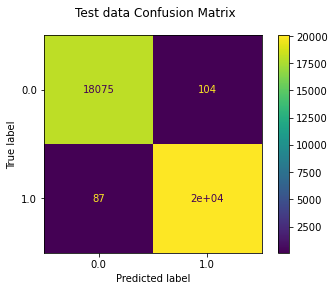

In [25]:
disp = metrics.plot_confusion_matrix(model_lr, x_test_pca_cst, y_test_bidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

**Unidir**

In [26]:
#Training
model_lr_uni = LogisticRegression(C=100000).fit(x_train_pca_uni_cst, y_unidir_train)

#Predict
y_pred_train_uni = model_lr_uni.predict(x_train_pca_uni_cst)
y_pred_val_uni = model_lr_uni.predict(x_val_pca_uni_cst)

print("Training Set Accuracy:", accuracy_score(y_unidir_train, y_pred_train_uni))
print("Validation Set Accuracy:", accuracy_score(y_unidir_val, y_pred_val_uni))

Training Set Accuracy: 0.609504132231405
Validation Set Accuracy: 0.622680412371134


In [27]:
print(f"Training data Classification report for classifier {model_lr_uni}:\n"
f"{metrics.classification_report(y_unidir_train, y_pred_train_uni)}\n")

Training data Classification report for classifier LogisticRegression(C=100000):
              precision    recall  f1-score   support

         0.0       0.57      0.69      0.62       899
         1.0       0.67      0.54      0.60      1037

    accuracy                           0.61      1936
   macro avg       0.62      0.61      0.61      1936
weighted avg       0.62      0.61      0.61      1936




In [28]:
print(f"Validation data Classification report for classifier {model_lr_uni}:\n"
f"{metrics.classification_report(y_unidir_val, y_pred_val_uni)}\n")

Validation data Classification report for classifier LogisticRegression(C=100000):
              precision    recall  f1-score   support

         0.0       0.60      0.72      0.66       243
         1.0       0.65      0.52      0.58       242

    accuracy                           0.62       485
   macro avg       0.63      0.62      0.62       485
weighted avg       0.63      0.62      0.62       485




Validation data Confusion matrix:
[[175  68]
 [115 127]]


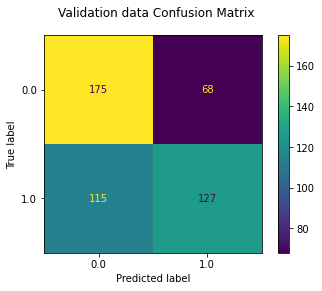

In [29]:
disp = metrics.plot_confusion_matrix(model_lr_uni, x_val_pca_uni_cst, y_unidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [30]:
#Predict
y_pred_uni_test = model_lr_uni.predict(x_test_pca_uni_cst)

print("Test Set Accuracy:", accuracy_score(y_test_unidir, y_pred_uni_test))

Test Set Accuracy: 0.6120186939079366


In [31]:
pd.crosstab(y_test_unidir, y_pred_uni_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,7843,3444,11287
1.0,5937,6955,12892
All,13780,10399,24179


In [32]:
print(f"Classification report for classifier {model_lr_uni}:\n"
f"{metrics.classification_report(y_test_unidir, y_pred_uni_test)}\n")

Classification report for classifier LogisticRegression(C=100000):
              precision    recall  f1-score   support

         0.0       0.57      0.69      0.63     11287
         1.0       0.67      0.54      0.60     12892

    accuracy                           0.61     24179
   macro avg       0.62      0.62      0.61     24179
weighted avg       0.62      0.61      0.61     24179




Test data Confusion matrix:
[[7843 3444]
 [5937 6955]]


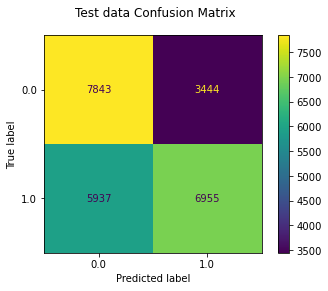

In [33]:
disp = metrics.plot_confusion_matrix(model_lr_uni, x_test_pca_uni_cst, y_test_unidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

*************

***LDA***

**Bidir**

In [34]:
#Training
model_lda = LinearDiscriminantAnalysis(solver='svd').fit(x_train_pca_cst, y_bidir_train)

#Predict
lday_pred_train = model_lda.predict(x_train_pca_cst)
lday_pred_val = model_lda.predict(x_val_pca_cst)

print("Training Set Accuracy:", accuracy_score(y_bidir_train, lday_pred_train))
print("Validation Set Accuracy:", accuracy_score(y_bidir_val, lday_pred_val))

Training Set Accuracy: 0.912303664921466
Validation Set Accuracy: 0.9057591623036649


In [35]:
print(f"Training data Classification report for classifier {model_lda}:\n"
f"{metrics.classification_report(y_bidir_train, lday_pred_train)}\n")

Training data Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      1454
         1.0       0.86      1.00      0.92      1602

    accuracy                           0.91      3056
   macro avg       0.93      0.91      0.91      3056
weighted avg       0.92      0.91      0.91      3056




In [36]:
print(f"Validation data Classification report for classifier {model_lda}:\n"
f"{metrics.classification_report(y_bidir_val, lday_pred_val)}\n")

Validation data Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90       387
         1.0       0.84      1.00      0.91       377

    accuracy                           0.91       764
   macro avg       0.92      0.91      0.91       764
weighted avg       0.92      0.91      0.91       764




Validation data Confusion matrix:
[[315  72]
 [  0 377]]


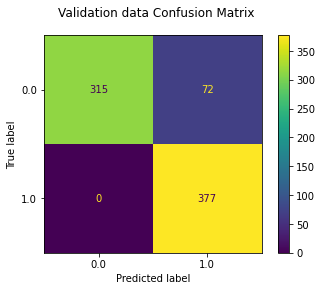

In [37]:
disp = metrics.plot_confusion_matrix(model_lda, x_val_pca_cst, y_bidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [38]:
#Predict
lday_pred_test = model_lda.predict(x_test_pca_cst)

print("Test Set Accuracy:", accuracy_score(y_test_bidir, lday_pred_test))

Test Set Accuracy: 0.9167971604551624


In [39]:
pd.crosstab(y_test_bidir, lday_pred_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,14994,3185,18179
1.0,3,20134,20137
All,14997,23319,38316


In [40]:
print(f"Classification report for classifier {model_lda}:\n"
f"{metrics.classification_report(y_test_bidir, lday_pred_test)}\n")

Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90     18179
         1.0       0.86      1.00      0.93     20137

    accuracy                           0.92     38316
   macro avg       0.93      0.91      0.92     38316
weighted avg       0.93      0.92      0.92     38316




Test data Confusion matrix:
[[14994  3185]
 [    3 20134]]


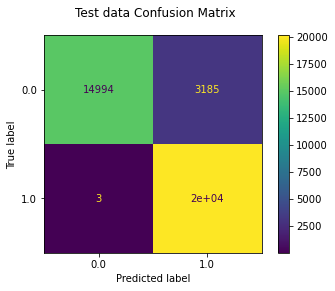

In [41]:
disp = metrics.plot_confusion_matrix(model_lda, x_test_pca_cst, y_test_bidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

**Unidir**

In [42]:
#Training
model_lda_uni = LinearDiscriminantAnalysis(solver='svd').fit(x_train_pca_uni_cst, y_unidir_train)

#Predict
lday_pred_train_uni = model_lda_uni.predict(x_train_pca_uni_cst)
lday_pred_val_uni = model_lda_uni.predict(x_val_pca_uni_cst)

print("Training Set Accuracy:", accuracy_score(y_unidir_train, lday_pred_train_uni))
print("Validation Set Accuracy:", accuracy_score(y_unidir_val, lday_pred_val_uni))

Training Set Accuracy: 0.6089876033057852
Validation Set Accuracy: 0.6247422680412371


In [43]:
print(f"Training data Classification report for classifier {model_lda_uni}:\n"
f"{metrics.classification_report(y_unidir_train, lday_pred_train_uni)}\n")

Training data Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.57      0.68      0.62       899
         1.0       0.67      0.54      0.60      1037

    accuracy                           0.61      1936
   macro avg       0.62      0.61      0.61      1936
weighted avg       0.62      0.61      0.61      1936




In [44]:
print(f"Validation data Classification report for classifier {model_lda_uni}:\n"
f"{metrics.classification_report(y_unidir_val, lday_pred_val_uni)}\n")

Validation data Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.60      0.72      0.66       243
         1.0       0.65      0.52      0.58       242

    accuracy                           0.62       485
   macro avg       0.63      0.62      0.62       485
weighted avg       0.63      0.62      0.62       485




Validation data Confusion matrix:
[[176  67]
 [115 127]]


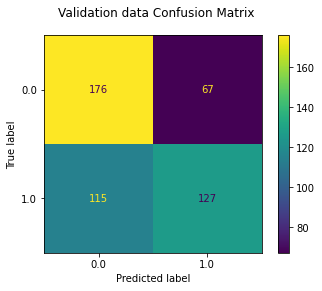

In [45]:
disp = metrics.plot_confusion_matrix(model_lda_uni, x_val_pca_uni_cst, y_unidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [46]:
#Predict
lday_pred_uni_test = model_lda_uni.predict(x_test_pca_uni_cst)

print("Test Set Accuracy:", accuracy_score(y_test_unidir, lday_pred_uni_test))

Test Set Accuracy: 0.6123082013317341


In [47]:
pd.crosstab(y_test_unidir, lday_pred_uni_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,7845,3442,11287
1.0,5932,6960,12892
All,13777,10402,24179


In [48]:
print(f"Classification report for classifier {model_lda_uni}:\n"
f"{metrics.classification_report(y_test_unidir, lday_pred_uni_test)}\n")

Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.57      0.70      0.63     11287
         1.0       0.67      0.54      0.60     12892

    accuracy                           0.61     24179
   macro avg       0.62      0.62      0.61     24179
weighted avg       0.62      0.61      0.61     24179




Test data Confusion matrix:
[[7845 3442]
 [5932 6960]]


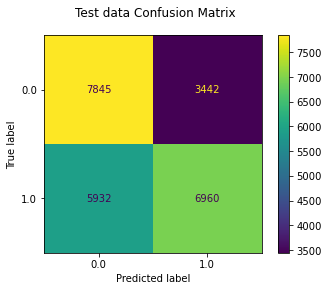

In [49]:
disp = metrics.plot_confusion_matrix(model_lda_uni, x_test_pca_uni_cst, y_test_unidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

******

***QDA***

**Bidir**

In [50]:
#Training
model_qda = QuadraticDiscriminantAnalysis().fit(x_train_pca_cst, y_bidir_train)

#Predict
qday_pred_train = model_qda.predict(x_train_pca_cst)
qday_pred_val = model_qda.predict(x_val_pca_cst)

print("Training Set Accuracy:", accuracy_score(y_bidir_train, qday_pred_train))
print("Validation Set Accuracy:", accuracy_score(y_bidir_val, qday_pred_val))

Training Set Accuracy: 0.4757853403141361
Validation Set Accuracy: 0.506544502617801


In [51]:
print(f"Training data Classification report for classifier {model_qda}:\n"
f"{metrics.classification_report(y_bidir_train, qday_pred_train)}\n")

Training data Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.48      1.00      0.64      1454
         1.0       0.00      0.00      0.00      1602

    accuracy                           0.48      3056
   macro avg       0.24      0.50      0.32      3056
weighted avg       0.23      0.48      0.31      3056




In [52]:
print(f"Validation data Classification report for classifier {model_qda}:\n"
f"{metrics.classification_report(y_bidir_val, qday_pred_val)}\n")

Validation data Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.51      1.00      0.67       387
         1.0       0.00      0.00      0.00       377

    accuracy                           0.51       764
   macro avg       0.25      0.50      0.34       764
weighted avg       0.26      0.51      0.34       764




Validation data Confusion matrix:
[[387   0]
 [377   0]]


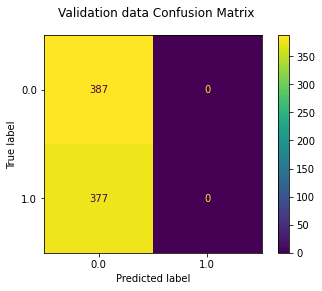

In [53]:
disp = metrics.plot_confusion_matrix(model_qda, x_val_pca_cst, y_bidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [54]:
#Predict
qday_pred_test = model_qda.predict(x_test_pca_cst)

print("Test Set Accuracy:", accuracy_score(y_test_bidir, qday_pred_test))

Test Set Accuracy: 0.47444931621254827


In [55]:
pd.crosstab(y_test_bidir, qday_pred_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,All
Actual,,
0.0,18179,18179
1.0,20137,20137
All,38316,38316


In [56]:
print(f"Classification report for classifier {model_qda}:\n"
f"{metrics.classification_report(y_test_bidir, qday_pred_test)}\n")

Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.47      1.00      0.64     18179
         1.0       0.00      0.00      0.00     20137

    accuracy                           0.47     38316
   macro avg       0.24      0.50      0.32     38316
weighted avg       0.23      0.47      0.31     38316




Test data Confusion matrix:
[[18179     0]
 [20137     0]]


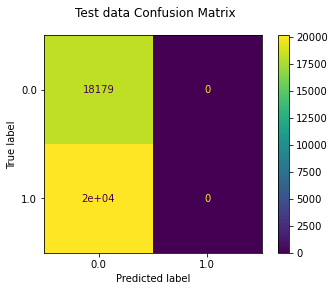

In [57]:
disp = metrics.plot_confusion_matrix(model_qda, x_test_pca_cst, y_test_bidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

**Unidir**

In [58]:
#Training
model_qda_uni = QuadraticDiscriminantAnalysis().fit(x_train_pca_uni_cst, y_unidir_train)

#Predict
qday_pred_train_uni = model_qda_uni.predict(x_train_pca_uni_cst)
qday_pred_val_uni = model_qda_uni.predict(x_val_pca_uni_cst)

print("Training Set Accuracy:", accuracy_score(y_unidir_train, qday_pred_train_uni))
print("Validation Set Accuracy:", accuracy_score(y_unidir_val, qday_pred_val_uni))

Training Set Accuracy: 0.4643595041322314
Validation Set Accuracy: 0.5010309278350515


In [59]:
print(f"Training data Classification report for classifier {model_qda_uni}:\n"
f"{metrics.classification_report(y_unidir_train, qday_pred_train_uni)}\n")

Training data Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.46      1.00      0.63       899
         1.0       0.00      0.00      0.00      1037

    accuracy                           0.46      1936
   macro avg       0.23      0.50      0.32      1936
weighted avg       0.22      0.46      0.29      1936




In [60]:
print(f"Validation data Classification report for classifier {model_qda_uni}:\n"
f"{metrics.classification_report(y_unidir_val, qday_pred_val_uni)}\n")

Validation data Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       243
         1.0       0.00      0.00      0.00       242

    accuracy                           0.50       485
   macro avg       0.25      0.50      0.33       485
weighted avg       0.25      0.50      0.33       485




Validation data Confusion matrix:
[[243   0]
 [242   0]]


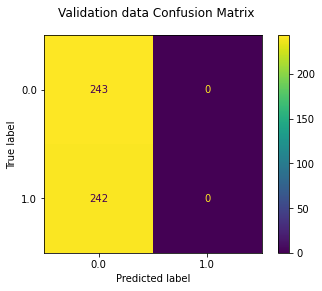

In [61]:
disp = metrics.plot_confusion_matrix(model_qda_uni, x_val_pca_uni_cst, y_unidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [62]:
#Predict
qday_pred_uni_test = model_qda_uni.predict(x_test_pca_uni_cst)

print("Test Set Accuracy:", accuracy_score(y_test_unidir, qday_pred_uni_test))

Test Set Accuracy: 0.4668100417717854


In [63]:
pd.crosstab(y_test_unidir, qday_pred_uni_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,All
Actual,,
0.0,11287,11287
1.0,12892,12892
All,24179,24179


In [64]:
print(f"Classification report for classifier {model_qda_uni}:\n"
f"{metrics.classification_report(y_test_unidir, qday_pred_uni_test)}\n")

Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

         0.0       0.47      1.00      0.64     11287
         1.0       0.00      0.00      0.00     12892

    accuracy                           0.47     24179
   macro avg       0.23      0.50      0.32     24179
weighted avg       0.22      0.47      0.30     24179




Test data Confusion matrix:
[[11287     0]
 [12892     0]]


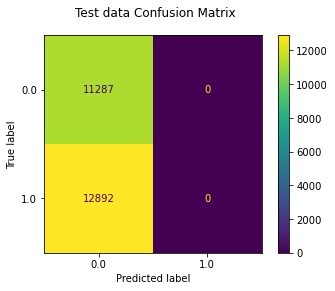

In [65]:
disp = metrics.plot_confusion_matrix(model_qda_uni, x_test_pca_uni_cst, y_test_unidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

***


***KNN***

**Bidir**

In [66]:
#Training
model_neigh = KNeighborsClassifier(n_neighbors=3).fit(x_train_pca_cst, y_bidir_train)

#Predict
neighy_pred_train = model_neigh.predict(x_train_pca_cst)
neighy_pred_val = model_neigh.predict(x_val_pca_cst)

print("Training Set Accuracy:", accuracy_score(y_bidir_train, neighy_pred_train))
print("Validation Set Accuracy:", accuracy_score(y_bidir_val, neighy_pred_val))

Training Set Accuracy: 1.0
Validation Set Accuracy: 0.9973821989528796


In [67]:
print(f"Training data Classification report for classifier {model_neigh}:\n"
f"{metrics.classification_report(y_bidir_train, neighy_pred_train)}\n")

Training data Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056




In [68]:
print(f"Validation data Classification report for classifier {model_neigh}:\n"
f"{metrics.classification_report(y_bidir_val, neighy_pred_val)}\n")

Validation data Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       387
         1.0       0.99      1.00      1.00       377

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764




Validation data Confusion matrix:
[[385   2]
 [  0 377]]


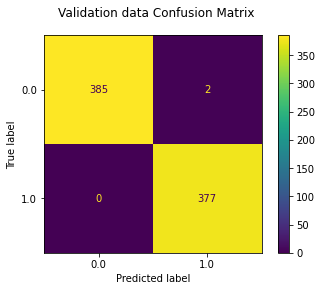

In [69]:
disp = metrics.plot_confusion_matrix(model_neigh, x_val_pca_cst, y_bidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [70]:
#Predict
neighy_pred_test = model_neigh.predict(x_test_pca_cst)

print("Test Set Accuracy:", accuracy_score(y_test_bidir, neighy_pred_test))

Test Set Accuracy: 0.9980947906879633


In [71]:
pd.crosstab(y_test_bidir, neighy_pred_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,18126,53,18179
1.0,20,20117,20137
All,18146,20170,38316


In [72]:
print(f"Classification report for classifier {model_neigh}:\n"
f"{metrics.classification_report(y_test_bidir, neighy_pred_test)}\n")

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18179
         1.0       1.00      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316




Test data Confusion matrix:
[[18126    53]
 [   20 20117]]


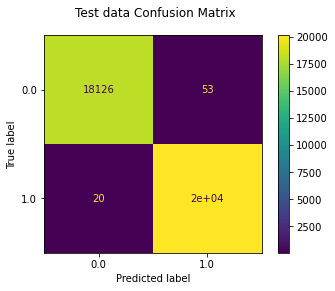

In [73]:
disp = metrics.plot_confusion_matrix(model_neigh, x_test_pca_cst, y_test_bidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

**Unidir**

In [74]:
#Training
model_neigh_uni = KNeighborsClassifier(n_neighbors=3).fit(x_train_pca_uni_cst, y_unidir_train)

#Predict
neighy_pred_train_uni = model_neigh_uni.predict(x_train_pca_uni_cst)
neighy_pred_val_uni = model_neigh_uni.predict(x_val_pca_uni_cst)

print("Training Set Accuracy:", accuracy_score(y_unidir_train, neighy_pred_train_uni))
print("Validation Set Accuracy:", accuracy_score(y_unidir_val, neighy_pred_val_uni))

Training Set Accuracy: 0.9917355371900827
Validation Set Accuracy: 0.9855670103092784


In [75]:
print(f"Training data Classification report for classifier {model_neigh_uni}:\n"
f"{metrics.classification_report(y_unidir_train, neighy_pred_train_uni)}\n")

Training data Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       899
         1.0       0.99      1.00      0.99      1037

    accuracy                           0.99      1936
   macro avg       0.99      0.99      0.99      1936
weighted avg       0.99      0.99      0.99      1936




In [76]:
print(f"Validation data Classification report for classifier {model_neigh_uni}:\n"
f"{metrics.classification_report(y_unidir_val, neighy_pred_val_uni)}\n")

Validation data Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       243
         1.0       0.98      0.99      0.99       242

    accuracy                           0.99       485
   macro avg       0.99      0.99      0.99       485
weighted avg       0.99      0.99      0.99       485




Validation data Confusion matrix:
[[238   5]
 [  2 240]]


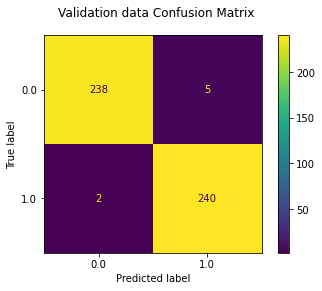

In [77]:
disp = metrics.plot_confusion_matrix(model_neigh_uni, x_val_pca_uni_cst, y_unidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [78]:
#Predict
neighy_pred_uni_test = model_neigh_uni.predict(x_test_pca_uni_cst)

print("Test Set Accuracy:", accuracy_score(y_test_unidir, neighy_pred_uni_test))

Test Set Accuracy: 0.9829190619959469


In [79]:
pd.crosstab(y_test_unidir, neighy_pred_uni_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,10948,339,11287
1.0,74,12818,12892
All,11022,13157,24179


In [80]:
print(f"Classification report for classifier {model_neigh_uni}:\n"
f"{metrics.classification_report(y_test_unidir, neighy_pred_uni_test)}\n")

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     11287
         1.0       0.97      0.99      0.98     12892

    accuracy                           0.98     24179
   macro avg       0.98      0.98      0.98     24179
weighted avg       0.98      0.98      0.98     24179




Test data Confusion matrix:
[[10948   339]
 [   74 12818]]


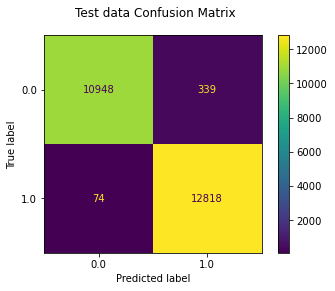

In [81]:
disp = metrics.plot_confusion_matrix(model_neigh_uni, x_test_pca_uni_cst, y_test_unidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

***

***Decision Tree***

**Bidir**

In [82]:
#Training
model_dt = DecisionTreeClassifier(random_state=0).fit(x_train_pca_cst, y_bidir_train)

#Predict
dty_pred_train = model_dt.predict(x_train_pca_cst)
dty_pred_val = model_dt.predict(x_val_pca_cst)

print("Training Set Accuracy:", accuracy_score(y_bidir_train, dty_pred_train))
print("Validation Set Accuracy:", accuracy_score(y_bidir_val, dty_pred_val))

Training Set Accuracy: 1.0
Validation Set Accuracy: 0.9986910994764397


In [83]:
print(f"Training data Classification report for classifier {model_dt}:\n"
f"{metrics.classification_report(y_bidir_train, dty_pred_train)}\n")

Training data Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056




In [84]:
print(f"Validation data Classification report for classifier {model_dt}:\n"
f"{metrics.classification_report(y_bidir_val, dty_pred_val)}\n")

Validation data Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       387
         1.0       1.00      1.00      1.00       377

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764




Validation data Confusion matrix:
[[386   1]
 [  0 377]]


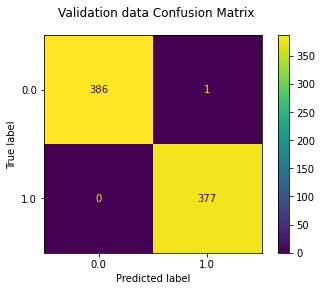

In [85]:
disp = metrics.plot_confusion_matrix(model_dt, x_val_pca_cst, y_bidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [86]:
#Predict
dty_pred_test = model_dt.predict(x_test_pca_cst)

print("Test Set Accuracy:", accuracy_score(y_test_bidir, dty_pred_test))

Test Set Accuracy: 0.9953805198872534


In [87]:
pd.crosstab(y_test_bidir, dty_pred_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,18071,108,18179
1.0,69,20068,20137
All,18140,20176,38316


In [88]:
print(f"Classification report for classifier {model_dt}:\n"
f"{metrics.classification_report(y_test_bidir, dty_pred_test)}\n")

Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     18179
         1.0       0.99      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316




Test data Confusion matrix:
[[18071   108]
 [   69 20068]]


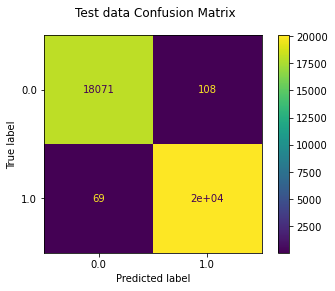

In [89]:
disp = metrics.plot_confusion_matrix(model_dt, x_test_pca_cst, y_test_bidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

**Unidir**

In [90]:
#Training
model_dt_uni = DecisionTreeClassifier(random_state=0).fit(x_train_pca_uni_cst, y_unidir_train)

#Predict
dty_pred_train_uni = model_dt_uni.predict(x_train_pca_uni_cst)
dty_pred_val_uni = model_dt_uni.predict(x_val_pca_uni_cst)

print("Training Set Accuracy:", accuracy_score(y_unidir_train, dty_pred_train_uni))
print("Validation Set Accuracy:", accuracy_score(y_unidir_val, dty_pred_val_uni))

Training Set Accuracy: 1.0
Validation Set Accuracy: 0.977319587628866


In [91]:
print(f"Training data Classification report for classifier {model_dt_uni}:\n"
f"{metrics.classification_report(y_unidir_train, dty_pred_train_uni)}\n")

Training data Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       899
         1.0       1.00      1.00      1.00      1037

    accuracy                           1.00      1936
   macro avg       1.00      1.00      1.00      1936
weighted avg       1.00      1.00      1.00      1936




In [92]:
print(f"Validation data Classification report for classifier {model_dt_uni}:\n"
f"{metrics.classification_report(y_unidir_val, dty_pred_val_uni)}\n")

Validation data Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       243
         1.0       0.99      0.97      0.98       242

    accuracy                           0.98       485
   macro avg       0.98      0.98      0.98       485
weighted avg       0.98      0.98      0.98       485




Validation data Confusion matrix:
[[240   3]
 [  8 234]]


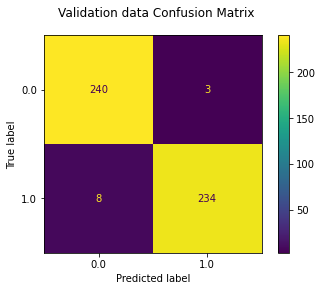

In [93]:
disp = metrics.plot_confusion_matrix(model_dt_uni, x_val_pca_uni_cst, y_unidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [94]:
#Predict
dty_pred_uni_test = model_dt_uni.predict(x_test_pca_uni_cst)

print("Test Set Accuracy:", accuracy_score(y_test_unidir, dty_pred_uni_test))

Test Set Accuracy: 0.9745233467058191


In [95]:
pd.crosstab(y_test_unidir, dty_pred_uni_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,10994,293,11287
1.0,323,12569,12892
All,11317,12862,24179


In [96]:
print(f"Classification report for classifier {model_dt_uni}:\n"
f"{metrics.classification_report(y_test_unidir, dty_pred_uni_test)}\n")

Classification report for classifier DecisionTreeClassifier(random_state=0):
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     11287
         1.0       0.98      0.97      0.98     12892

    accuracy                           0.97     24179
   macro avg       0.97      0.97      0.97     24179
weighted avg       0.97      0.97      0.97     24179




Test data Confusion matrix:
[[10994   293]
 [  323 12569]]


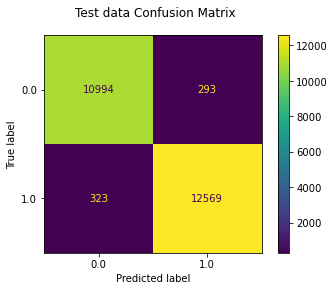

In [97]:
disp = metrics.plot_confusion_matrix(model_dt_uni, x_test_pca_uni_cst, y_test_unidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

***

***SVM***

**Bidir**

In [98]:
#Training
model_svm = svm.SVC(kernel='poly', C=1, gamma='auto').fit(x_train_pca_cst, y_bidir_train)

#Predict
svmy_pred_train = model_svm.predict(x_train_pca_cst)
svmy_pred_val = model_svm.predict(x_val_pca_cst)

print("Training Set Accuracy:", accuracy_score(y_bidir_train, svmy_pred_train))
print("Validation Set Accuracy:", accuracy_score(y_bidir_val, svmy_pred_val))

Training Set Accuracy: 1.0
Validation Set Accuracy: 0.9960732984293194


In [99]:
print(f"Training data Classification report for classifier {model_svm}:\n"
f"{metrics.classification_report(y_bidir_train, svmy_pred_train)}\n")

Training data Classification report for classifier SVC(C=1, gamma='auto', kernel='poly'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1454
         1.0       1.00      1.00      1.00      1602

    accuracy                           1.00      3056
   macro avg       1.00      1.00      1.00      3056
weighted avg       1.00      1.00      1.00      3056




In [100]:
print(f"Validation data Classification report for classifier {model_svm}:\n"
f"{metrics.classification_report(y_bidir_val, svmy_pred_val)}\n")

Validation data Classification report for classifier SVC(C=1, gamma='auto', kernel='poly'):
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       387
         1.0       0.99      1.00      1.00       377

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764




Validation data Confusion matrix:
[[384   3]
 [  0 377]]


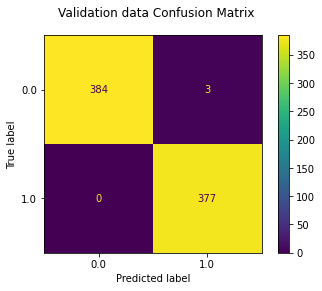

In [101]:
disp = metrics.plot_confusion_matrix(model_svm, x_val_pca_cst, y_bidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [102]:
#Predict
svmy_pred_test = model_svm.predict(x_test_pca_cst)

print("Test Set Accuracy:", accuracy_score(y_test_bidir, svmy_pred_test))

Test Set Accuracy: 0.9972857291992901


In [103]:
pd.crosstab(y_test_bidir, svmy_pred_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0,All
Actual,,,
0.0,18097,82,18179
1.0,22,20115,20137
All,18119,20197,38316


In [104]:
print(f"Classification report for classifier {model_svm}:\n"
f"{metrics.classification_report(y_test_bidir, svmy_pred_test)}\n")

Classification report for classifier SVC(C=1, gamma='auto', kernel='poly'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18179
         1.0       1.00      1.00      1.00     20137

    accuracy                           1.00     38316
   macro avg       1.00      1.00      1.00     38316
weighted avg       1.00      1.00      1.00     38316




Test data Confusion matrix:
[[18097    82]
 [   22 20115]]


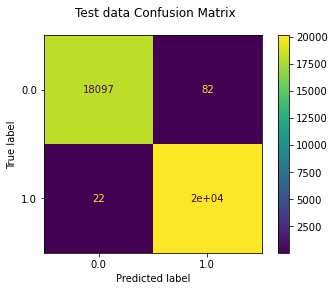

In [105]:
disp = metrics.plot_confusion_matrix(model_svm, x_test_pca_cst, y_test_bidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

**Unidir**

In [ ]:
#Training
model_svm_uni = svm.SVC(kernel='poly', C=1, gamma='auto').fit(x_train_pca_uni_cst, y_unidir_train)

#Predict
svmy_pred_train_uni = model_svm_uni.predict(x_train_pca_uni_cst)
svmy_pred_val_uni = model_svm_uni.predict(x_val_pca_uni_cst)

print("Training Set Accuracy:", accuracy_score(y_unidir_train, svmy_pred_train_uni))
print("Validation Set Accuracy:", accuracy_score(y_unidir_val, svmy_pred_val_uni))

In [ ]:
print(f"Training data Classification report for classifier {model_svm_uni}:\n"
f"{metrics.classification_report(y_unidir_train, svmy_pred_train_uni)}\n")

In [ ]:
print(f"Validation data Classification report for classifier {model_svm_uni}:\n"
f"{metrics.classification_report(y_unidir_val, svmy_pred_val_uni)}\n")

In [ ]:
disp = metrics.plot_confusion_matrix(model_svm_uni, x_val_pca_uni_cst, y_unidir_val)
disp.figure_.suptitle("Validation data Confusion Matrix")
print(f"Validation data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
#Predict
svmy_pred_uni_test = model_svm_uni.predict(x_test_pca_uni_cst)

print("Test Set Accuracy:", accuracy_score(y_test_unidir, svmy_pred_uni_test))

In [ ]:
pd.crosstab(y_test_unidir, svmy_pred_uni_test, margins=True, rownames=['Actual'], colnames=['Predicted'])

In [ ]:
print(f"Classification report for classifier {model_svm_uni}:\n"
f"{metrics.classification_report(y_test_unidir, svmy_pred_uni_test)}\n")

In [ ]:
disp = metrics.plot_confusion_matrix(model_svm_uni, x_test_pca_uni_cst, y_test_unidir)
disp.figure_.suptitle("Test data Confusion Matrix")
print(f"Test data Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

***